In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13

#### Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2023s/blob/master/docs/calendar.html).

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={points:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023s/blob/main/docs/homework_instructions.md).
- Upload the .ipynb file to Gradescope.
- **If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb.** 
- Make sure that your plots/output are rendered properly in Gradescope.

## Imports

In [2]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Type your answer here, replacing this text._

In [3]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: EDUCATION, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

In [8]:
train_df.describe().loc['count']

ID                            21000.0
LIMIT_BAL                     21000.0
SEX                           21000.0
EDUCATION                     21000.0
MARRIAGE                      21000.0
AGE                           21000.0
PAY_0                         21000.0
PAY_2                         21000.0
PAY_3                         21000.0
PAY_4                         21000.0
PAY_5                         21000.0
PAY_6                         21000.0
BILL_AMT1                     21000.0
BILL_AMT2                     21000.0
BILL_AMT3                     21000.0
BILL_AMT4                     21000.0
BILL_AMT5                     21000.0
BILL_AMT6                     21000.0
PAY_AMT1                      21000.0
PAY_AMT2                      21000.0
PAY_AMT3                      21000.0
PAY_AMT4                      21000.0
PAY_AMT5                      21000.0
PAY_AMT6                      21000.0
default.payment.next.month    21000.0
Name: count, dtype: float64

In [9]:
train_df["default.payment.next.month"].value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

2. The mean for default.payment.next.month is 0.22, indicating that roughly a quarter of the examples will be a default.
The count for all columns is 21000, indicating that all cells are filled and no imputations are needed.


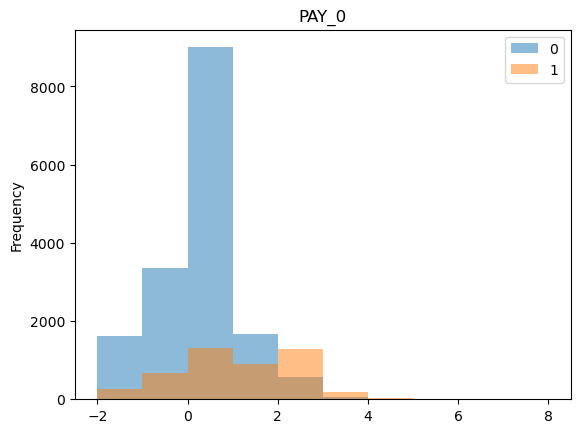

In [10]:
train_df.groupby("default.payment.next.month")["PAY_0"].plot.hist(bins=10, alpha=0.5, title="PAY_0", legend=True)
plt.show()
# This histogram shows that those who delay payments by 2 or more months are far more likely to default on their payments.

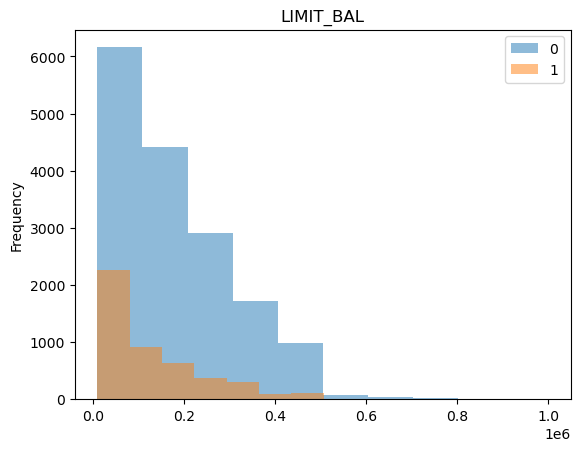

In [11]:
train_df.groupby("default.payment.next.month")["LIMIT_BAL"].plot.hist(bins=10, alpha=0.5, title="LIMIT_BAL", legend=True)
plt.show()
# This histogram shows that those with higher balance limits are proportionally less likely to default on payments
# This makes sense as their limits should reflect the bank's trust in them.

3. No missing values.  
All types are already numerical, either float or int.  Seems like usual categorical features such as sex, education, marriage, and pay (repayment status) have already been encoded, all ordinally.  The encodings don't make the most sense as sex could have been binary OHE, and education and marriage have "unknown" and "other" which may disrupt the numerical results.
Slight class imbalance of around 1 default for every 3 non-defaults.
The charts appear right skewed.

4. Recall would be a good metric for assessment since the bank is a business and would like to avoid lending to people who may default.
F1 score may also be a good metric if the bank wants to maximize profit from loans by lending to as many people as possible, so it may also want to assess precision along with recall.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

1. I'm creating features that represent the differences in payments made and owed payments because it is possible that people who pay less than the amount they owe are likely to eventually default on their payments.

In [12]:
train_df = train_df.assign(DIFF_1 = train_df["BILL_AMT1"] - train_df["PAY_AMT1"])
train_df = train_df.assign(DIFF_2 = train_df["BILL_AMT2"] - train_df["PAY_AMT2"])
train_df = train_df.assign(DIFF_3 = train_df["BILL_AMT3"] - train_df["PAY_AMT3"])
train_df = train_df.assign(DIFF_4 = train_df["BILL_AMT4"] - train_df["PAY_AMT4"])
train_df = train_df.assign(DIFF_5 = train_df["BILL_AMT5"] - train_df["PAY_AMT5"])
train_df = train_df.assign(DIFF_6 = train_df["BILL_AMT6"] - train_df["PAY_AMT6"])
train_df

test_df = test_df.assign(DIFF_1 = test_df["BILL_AMT1"] - test_df["PAY_AMT1"])
test_df = test_df.assign(DIFF_2 = test_df["BILL_AMT2"] - test_df["PAY_AMT2"])
test_df = test_df.assign(DIFF_3 = test_df["BILL_AMT3"] - test_df["PAY_AMT3"])
test_df = test_df.assign(DIFF_4 = test_df["BILL_AMT4"] - test_df["PAY_AMT4"])
test_df = test_df.assign(DIFF_5 = test_df["BILL_AMT5"] - test_df["PAY_AMT5"])
test_df = test_df.assign(DIFF_6 = test_df["BILL_AMT6"] - test_df["PAY_AMT6"])
test_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DIFF_1,DIFF_2,DIFF_3,DIFF_4,DIFF_5,DIFF_6
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,22373.0,680.0,10000.0,0,27691.0,23391.0,13600.0,-22373.0,43344.0,8697.0
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,1603.0,1903.0,2006.0,0,72450.0,67967.0,51169.0,49272.0,48469.0,47464.0
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,13000.0,5500.0,1000.0,1,149110.0,152319.0,161487.0,144577.0,162594.0,169922.0
10149,10150,200000.0,2,2,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,1,22828.0,735.0,0.0,0.0,0.0,0.0
8729,8730,50000.0,1,2,1,43,0,0,0,0,...,341.0,356.0,330.0,0,7074.0,6884.0,8713.0,8884.0,9061.0,9287.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548,17549,60000.0,2,2,1,48,0,0,0,0,...,600.0,1000.0,1000.0,1,48806.0,48880.0,50474.0,51208.0,15941.0,16295.0
11459,11460,310000.0,1,2,1,43,-1,-1,-1,-1,...,2505.0,816.0,3052.0,0,2252.0,631.0,42.0,-501.0,1687.0,-2238.0
6608,6609,10000.0,2,2,2,22,0,0,0,0,...,1535.0,0.0,1000.0,0,4680.0,5862.0,7144.0,7326.0,10104.0,8803.0
2414,2415,30000.0,1,2,1,38,1,-1,-1,-1,...,0.0,0.0,0.0,1,-2281.0,-1385.0,953.0,2713.0,0.0,0.0


<!-- END QUESTION -->


<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

1.
- All the features are already numerical.
- Due to the lack of relevance, we can drop the ID column.
- We should apply standard scaling to all the numeric non-categorical columns.
- Education and marriage should be encoded with OHE instead since their ordinality doesn't make the most sense.
- Sex should be encoded with binary OHE instead since it only has 2 values.

In [13]:
X_train = train_df.drop(columns="default.payment.next.month")
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns="default.payment.next.month")
y_test = test_df["default.payment.next.month"]

In [14]:
num_fts = ["LIMIT_BAL", "AGE", 
               "DIFF_1", "DIFF_2", "DIFF_3", "DIFF_4", "DIFF_5", "DIFF_6",
               "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", 
               "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", 
               "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
ohe_fts = ["EDUCATION", "MARRIAGE"]
bin_fts = ["SEX"]
drop_fts = ["ID"]
ct = make_column_transformer(
    (StandardScaler(), num_fts),
    (OneHotEncoder(sparse="false", handle_unknown="ignore"), ohe_fts),
    (OneHotEncoder(drop="if_binary", sparse="false"), bin_fts),
    ("drop", drop_fts)
)

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [15]:
dummy = DummyClassifier()
pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score=True)).mean()

fit_time       0.002986
score_time     0.000074
test_score     0.776762
train_score    0.776762
dtype: float64

<!-- END QUESTION -->



In [16]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

The baseline model scores exactly the percentage of the most frequent class, which is 0, as expected.

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

In [17]:
scoring_metrics = {
    "accuracy": "accuracy",
    "recall": "recall_weighted",
    "precision": "precision_weighted",
    "f1": "f1_weighted"
}

scoring = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    
    "mean_train_accuracy": list(),
    "mean_cv_accuracy": list(),
    "mean_train_f1": list(),
    "mean_cv_f1": list(),
    
    "std_train_accuracy": list(),
    "std_cv_accuracy": list(),
    "std_train_f1": list(),
    "std_cv_f1": list(),
    
    "recall": list(),
    "precision": list(),
    
    "mean_fit_time": list(),
    "mean_score_time": list(),
}

for C in scoring["C"]:
    pipe_log = make_pipeline(ct, LogisticRegression(C=C, max_iter=500))
    scores = cross_validate(pipe_log, X_train, y_train, return_train_score=True, scoring=scoring_metrics)
    
    scoring["mean_train_accuracy"].append(scores["train_accuracy"].mean())
    scoring["mean_cv_accuracy"].append(scores["test_accuracy"].mean())
    scoring["mean_train_f1"].append(scores["train_f1"].mean())
    scoring["mean_cv_f1"].append(scores["test_f1"].mean())
    
    scoring["std_train_accuracy"].append(scores["train_accuracy"].std())
    scoring["std_cv_accuracy"].append(scores["test_accuracy"].std())
    scoring["std_train_f1"].append(scores["train_f1"].std())
    scoring["std_cv_f1"].append(scores["test_f1"].std())
    
    scoring["recall"].append(scores["test_recall"].mean())
    scoring["precision"].append(scores["test_precision"].mean())
    
    scoring["mean_fit_time"].append(scores["fit_time"].mean())
    scoring["mean_score_time"].append(scores["score_time"].mean())

results_df = pd.DataFrame(scoring)
results_df

,C,mean_train_accuracy,mean_cv_accuracy,mean_train_f1,mean_cv_f1,std_train_accuracy,std_cv_accuracy,std_train_f1,std_cv_f1,recall,precision,mean_fit_time,mean_score_time
0,0.0001,0.778905,0.778810,0.687622,0.687442,0.000144,0.000782,0.000212,0.001307,0.778810,0.757178,0.033520,0.011210
1,0.0010,0.800571,0.800667,0.747737,0.747994,0.000831,0.002823,0.001642,0.005254,0.800667,0.788529,0.037834,0.011210
2,0.0100,0.809155,0.808333,0.768596,0.767403,0.001283,0.002003,0.002409,0.003613,0.808333,0.794102,0.057801,0.010279
3,0.1000,0.810905,0.810238,0.772567,0.771968,0.001290,0.001724,0.002326,0.002824,0.810238,0.795750,0.109101,0.010110
4,1.0000,0.811214,0.810476,0.773159,0.772513,0.001256,0.001763,0.002292,0.002815,0.810476,0.795987,0.240230,0.010013
5,10.0000,0.811262,0.810571,0.773245,0.772628,0.001346,0.001626,0.002431,0.002599,0.810571,0.796174,0.230061,0.011175
6,100.0000,0.811262,0.810571,0.773245,0.772670,0.001357,0.001626,0.002442,0.002522,0.810571,0.796135,0.220529,0.010209
7,1000.0000,0.811250,0.810571,0.773236,0.772670,0.001366,0.001626,0.002445,0.002522,0.810571,0.796135,0.284754,0.010408
8,10000.0000,0.811286,0.810571,0.773274,0.772670,0.001343,0.001626,0.002417,0.002522,0.810571,0.796135,0.218579,0.009208
9,100000.0000,0.811262,0.810571,0.773245,0.772670,0.001329,0.001626,0.002398,0.002522,0.810571,0.796135,0.209032,0.009409


C = 10.0 seems to be the best hyperparameter value because it has the highest cross validation, recall, and precision scores.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [18]:
scoring = {
    
    "mean_train_accuracy": list(),
    "mean_cv_accuracy": list(),
    "mean_train_f1": list(),
    "mean_cv_f1": list(),
    
    "std_train_accuracy": list(),
    "std_cv_accuracy": list(),
    "std_train_f1": list(),
    "std_cv_f1": list(),
    
    "recall": list(),
    "precision": list(),
    
    "mean_fit_time": list(),
    "mean_score_time": list(),
}

In [19]:
pipe_log = make_pipeline(ct, RandomForestClassifier(random_state=123, n_jobs=-1))
scores = cross_validate(pipe_log, X_train, y_train, return_train_score=True, scoring=scoring_metrics)

scoring["mean_train_accuracy"].append(scores["train_accuracy"].mean())
scoring["mean_cv_accuracy"].append(scores["test_accuracy"].mean())
scoring["mean_train_f1"].append(scores["train_f1"].mean())
scoring["mean_cv_f1"].append(scores["test_f1"].mean())

scoring["std_train_accuracy"].append(scores["train_accuracy"].std())
scoring["std_cv_accuracy"].append(scores["test_accuracy"].std())
scoring["std_train_f1"].append(scores["train_f1"].std())
scoring["std_cv_f1"].append(scores["test_f1"].std())

scoring["recall"].append(scores["test_recall"].mean())
scoring["precision"].append(scores["test_precision"].mean())

scoring["mean_fit_time"].append(scores["fit_time"].mean())
scoring["mean_score_time"].append(scores["score_time"].mean())

results_df = pd.DataFrame(scoring)
results_df

,mean_train_accuracy,mean_cv_accuracy,mean_train_f1,mean_cv_f1,std_train_accuracy,std_cv_accuracy,std_train_f1,std_cv_f1,recall,precision,mean_fit_time,mean_score_time
0,0.999381,0.813762,0.999381,0.794044,0.00011,0.004059,0.00011,0.003555,0.813762,0.795443,1.299752,0.040237


In [20]:
from sklearn.svm import SVC

pipe_log = make_pipeline(ct, SVC(kernel="linear"))
scores = cross_validate(pipe_log, X_train, y_train, return_train_score=True, scoring=scoring_metrics)

scoring["mean_train_accuracy"].append(scores["train_accuracy"].mean())
scoring["mean_cv_accuracy"].append(scores["test_accuracy"].mean())
scoring["mean_train_f1"].append(scores["train_f1"].mean())
scoring["mean_cv_f1"].append(scores["test_f1"].mean())

scoring["std_train_accuracy"].append(scores["train_accuracy"].std())
scoring["std_cv_accuracy"].append(scores["test_accuracy"].std())
scoring["std_train_f1"].append(scores["train_f1"].std())
scoring["std_cv_f1"].append(scores["test_f1"].std())

scoring["recall"].append(scores["test_recall"].mean())
scoring["precision"].append(scores["test_precision"].mean())

scoring["mean_fit_time"].append(scores["fit_time"].mean())
scoring["mean_score_time"].append(scores["score_time"].mean())

results_df = pd.DataFrame(scoring)
results_df

,mean_train_accuracy,mean_cv_accuracy,mean_train_f1,mean_cv_f1,std_train_accuracy,std_cv_accuracy,std_train_f1,std_cv_f1,recall,precision,mean_fit_time,mean_score_time
0,0.999381,0.813762,0.999381,0.794044,0.000110,0.004059,0.00011,0.003555,0.813762,0.795443,1.299752,0.040237
1,0.808905,0.809000,0.770987,0.770881,0.000864,0.003358,0.00176,0.004486,0.809000,0.793095,15.894899,0.705485


In [21]:
from sklearn.tree import DecisionTreeClassifier

pipe_log = make_pipeline(ct, DecisionTreeClassifier())
scores = cross_validate(pipe_log, X_train, y_train, return_train_score=True, scoring=scoring_metrics)

scoring["mean_train_accuracy"].append(scores["train_accuracy"].mean())
scoring["mean_cv_accuracy"].append(scores["test_accuracy"].mean())
scoring["mean_train_f1"].append(scores["train_f1"].mean())
scoring["mean_cv_f1"].append(scores["test_f1"].mean())

scoring["std_train_accuracy"].append(scores["train_accuracy"].std())
scoring["std_cv_accuracy"].append(scores["test_accuracy"].std())
scoring["std_train_f1"].append(scores["train_f1"].std())
scoring["std_cv_f1"].append(scores["test_f1"].std())

scoring["recall"].append(scores["test_recall"].mean())
scoring["precision"].append(scores["test_precision"].mean())

scoring["mean_fit_time"].append(scores["fit_time"].mean())
scoring["mean_score_time"].append(scores["score_time"].mean())

results_df = pd.DataFrame(scoring)
results_df

,mean_train_accuracy,mean_cv_accuracy,mean_train_f1,mean_cv_f1,std_train_accuracy,std_cv_accuracy,std_train_f1,std_cv_f1,recall,precision,mean_fit_time,mean_score_time
0,0.999381,0.813762,0.999381,0.794044,0.000110,0.004059,0.00011,0.003555,0.813762,0.795443,1.299752,0.040237
1,0.808905,0.809000,0.770987,0.770881,0.000864,0.003358,0.00176,0.004486,0.809000,0.793095,15.894899,0.705485
2,0.999405,0.723714,0.999404,0.727794,0.000100,0.008797,0.00010,0.007642,0.723714,0.732536,0.401643,0.008809


2. Decision tree and random forests look clearly overfitted with their near perfect train accuracy and low validation accuracy.  Linear SVC is very similar to the logistic regression model, and both seem underfitted due to their lower training accuracy and near matching validation accuracy.  In terms of time, decision tree was very fast due to its simplicity, followed by logical regression, then random forests, and lastly linear SVM was far slower.

<!-- BEGIN QUESTION -->

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [22]:
from sklearn.feature_selection import RFECV

rfe_cv = RFECV(LogisticRegression(max_iter=2000), cv=10)
rfe_cv

pipe_log = make_pipeline(ct, rfe_cv)
scores = cross_validate(pipe_log, X_train, y_train, return_train_score=True, scoring=scoring_metrics)

scoring["mean_train_accuracy"].append(scores["train_accuracy"].mean())
scoring["mean_cv_accuracy"].append(scores["test_accuracy"].mean())
scoring["mean_train_f1"].append(scores["train_f1"].mean())
scoring["mean_cv_f1"].append(scores["test_f1"].mean())

scoring["std_train_accuracy"].append(scores["train_accuracy"].std())
scoring["std_cv_accuracy"].append(scores["test_accuracy"].std())
scoring["std_train_f1"].append(scores["train_f1"].std())
scoring["std_cv_f1"].append(scores["test_f1"].std())

scoring["recall"].append(scores["test_recall"].mean())
scoring["precision"].append(scores["test_precision"].mean())

scoring["mean_fit_time"].append(scores["fit_time"].mean())
scoring["mean_score_time"].append(scores["score_time"].mean())

results_df = pd.DataFrame(scoring)
results_df

,mean_train_accuracy,mean_cv_accuracy,mean_train_f1,mean_cv_f1,std_train_accuracy,std_cv_accuracy,std_train_f1,std_cv_f1,recall,precision,mean_fit_time,mean_score_time
0,0.999381,0.813762,0.999381,0.794044,0.000110,0.004059,0.000110,0.003555,0.813762,0.795443,1.299752,0.040237
1,0.808905,0.809000,0.770987,0.770881,0.000864,0.003358,0.001760,0.004486,0.809000,0.793095,15.894899,0.705485
2,0.999405,0.723714,0.999404,0.727794,0.000100,0.008797,0.000100,0.007642,0.723714,0.732536,0.401643,0.008809
3,0.818845,0.818762,0.791988,0.791877,0.001232,0.005094,0.001417,0.005732,0.818762,0.803463,29.263350,0.009008


The scores increased slightly, by around 1% each, but the change seems insignificant.

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [23]:
param_grid = {
    "n_estimators": [1, 5, 10, 20],
    "max_depth": [1, 5, 10, 20],
}

results_dict = {"n_estimators": [], "max_depth": [], "mean_cv_score": []}

for max_depth in param_grid["max_depth"]:
    for n_estimators in param_grid["n_estimators"]:
        pipe = make_pipeline(ct, RandomForestClassifier(random_state=123, n_jobs=-1))
        scores = cross_val_score(pipe, X_train, y_train)
        mean_score = np.mean(scores)
        results_dict["n_estimators"].append(n_estimators)
        results_dict["max_depth"].append(max_depth)
        results_dict["mean_cv_score"].append(mean_score)
pd.DataFrame(results_dict)

,n_estimators,max_depth,mean_cv_score
0,1,1,0.813762
1,5,1,0.813762
2,10,1,0.813762
3,20,1,0.813762
4,1,5,0.813762
5,5,5,0.813762
6,10,5,0.813762
7,20,5,0.813762
8,1,10,0.813762
9,5,10,0.813762


Random forest hyperparameters don't seem to affect the scores.

In [24]:
best_score = 0

param_grid = {"max_depth": np.arange(1, 20, 2)}

results_dict = {"max_depth": [], "mean_cv_score": []}

for depth in param_grid["max_depth"]:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, X_train, y_train)  # perform cross-validation
    mean_score = np.mean(scores)  # compute mean cross-validation accuracy
    if mean_score > best_score:  # if we got a better score, store the score and parameters
        best_score = mean_score
        best_params = {"max_depth": depth}
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(mean_score)
pd.DataFrame(results_dict)

,max_depth,mean_cv_score
0,1,0.818381
1,3,0.819095
2,5,0.817238
3,7,0.813762
4,9,0.809238
5,11,0.801095
6,13,0.788619
7,15,0.776762
8,17,0.766381
9,19,0.753714


We can see that the cross-validation score peaks at max-depth = 1 for the DecisionTreeClassifier.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

In [25]:
import eli5
# graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
feature_names = num_fts + ["EDU_GRAD", "EDU_UNI", "EDU_HIGH", "EDU_OTHERS", "EDU_UNKNOWN1", "EDU_UNKNOWN2", "MARRIED", "SINGLE", "MARRIED_OTHERS", "MALE", "FEMALE", "ID"]
pipe = make_pipeline(ct, RandomForestClassifier(random_state=123, n_jobs=-1))
pipe.fit(X_train, y_train)
eli5 = eli5.explain_weights(
    pipe.named_steps["randomforestclassifier"], feature_names=feature_names
)
eli5

Weight,Feature
0.0993 ± 0.0935,PAY_0
0.0542 ± 0.0073,AGE
0.0486 ± 0.0100,LIMIT_BAL
0.0406 ± 0.0742,PAY_2
0.0399 ± 0.0093,DIFF_1
0.0397 ± 0.0081,BILL_AMT1
0.0381 ± 0.0156,PAY_AMT1
0.0361 ± 0.0092,DIFF_2
0.0358 ± 0.0116,PAY_AMT2
0.0358 ± 0.0099,DIFF_3


2. It appears that the first repayment status, age, and balance limit are the strongest indicators of payment defaulting.  This is followed by diff, bill, and pay amounts.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Type your answer here, replacing this text._

In [26]:
pipe_log = make_pipeline(ct, LogisticRegression(C=10, max_iter=500))
pipe_log.fit(X_train, y_train)
pipe_log.predict(X_test)
pipe_log.score(X_test, y_test)

0.8142222222222222

2. Yes, the test score is very close to the mean cross-validation scores previous.  There haven't been issues with optimization bias since it's very much not overfitted.

In [27]:
test_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DIFF_1,DIFF_2,DIFF_3,DIFF_4,DIFF_5,DIFF_6
25665,25666,40000.0,2,2,2,26,-1,0,0,0,...,22373.0,680.0,10000.0,0,27691.0,23391.0,13600.0,-22373.0,43344.0,8697.0
16464,16465,80000.0,2,3,1,59,0,0,0,0,...,1603.0,1903.0,2006.0,0,72450.0,67967.0,51169.0,49272.0,48469.0,47464.0
22386,22387,170000.0,2,1,2,30,2,2,2,2,...,13000.0,5500.0,1000.0,1,149110.0,152319.0,161487.0,144577.0,162594.0,169922.0


In [28]:
# import shap

# log_explainer = shap.KernelExplainer(LogisticRegression(C=10, max_iter=500).fit(X_train, y_train).predict_proba, X_train)
# shap_values = log_explainer.shap_values(X_test)
# shap.force_plot(
#     log_explainer.expected_value[0],
#     shap_values[0][0, :],
#     X_test.iloc[0, :],
#     matplotlib=True
# )

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Type your answer here, replacing this text._

The model produced in this assignment didn't seem to work too well as all of the training, validation, and test scores were in the low 80's.  Improvements could have been made with feature engineering and transformations and how the model was produced.
I could try scaling the features differently, extending the range of my hyperparameter searches, and choosing different types of transformations for the features.
My final test score is 0.814.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Optional) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

It's important to consider both the intuitive and practical implications of transformations, engineering, and selection of features to ensure that we produce a model that reflects the real world as accurately as possible.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)